**NOTE :**
- This Python File runs in GoogleColab

# Import Library

Importing the libraries and file from Google Drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Data Import

In [3]:
import statistics
import re 

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import scipy.cluster.hierarchy as shc

In [4]:
LP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laptop_Price.csv')
LP

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,2.19kg,764.00


#2. Data Preparation

Cleaning up data separating "words" from strings, while keeping the 
numbers as "integers" Value

1.   Cpu
2.   Ram
3.   Memory (encoded to different Storage type column)
4.   Weight

These 4 variables requires to be cleansed. 
Encoded the **Storage Type** of the memory, to evaluate the correlation of each variable to its prices.



In [5]:
LP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Company      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram          1303 non-null   object 
 6   Memory       1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price_euros  1303 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 101.9+ KB


In [6]:
LP.isnull().sum()

laptop_ID      0
Company        0
TypeName       0
Inches         0
Cpu            0
Ram            0
Memory         0
OpSys          0
Weight         0
Price_euros    0
dtype: int64

In [7]:
LP.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [8]:
LP.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [9]:
LP.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
CPU_Core = LP['Cpu'].str.extract(r'\b(M|i3|i5|i7|Cortex|Atom|Pentium|Celeron|E-Series|Ryzen|Xeon|A4|A6|A8|A9|A10|A12|FX)\b').rename(columns = {0:'Cpu_Core'})

In [11]:
CPU_Core

,Cpu_Core
0,i5
1,i5
2,i5
3,i7
4,i5
...,...
1298,i7
1299,i7
1300,Celeron
1301,i7


In [12]:
CPU = LP['Cpu'].str.rsplit(' ', 1, expand = True).rename(columns = {0:'Cpu_Brand',1: 'Cpu_Speed'})
CPU = CPU["Cpu_Speed"].str.rsplit("G", 1, expand = True).rename(columns = {0:'Cpu_GHZ',1: 'freq'})
CPU.drop(columns={'freq'}, inplace = True)
CPU

,Cpu_GHZ
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1
...,...
1298,2.5
1299,2.5
1300,1.6
1301,2.5


In [13]:
W = LP["Weight"].str.rsplit("k", 1, expand = True).rename(columns = {0:'Weight_kg'})
W.drop(columns=1, inplace = True)
W

,Weight_kg
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.8
1299,1.3
1300,1.5
1301,2.19


In [14]:
R = LP["Ram"].str.rsplit("G", 1, expand = True).rename(columns = {0:'Ram_GB'})
R.drop(columns=1, inplace = True)
R

,Ram_GB
0,8
1,8
2,8
3,16
4,8
...,...
1298,4
1299,16
1300,2
1301,6


In [15]:
LP = pd.concat([LP, CPU_Core, CPU, R, W], axis = 1)
LP.drop(columns=['Cpu','Weight', 'Ram', 'TypeName','OpSys'], inplace = True)
LP

,laptop_ID,Company,Inches,Memory,Price_euros,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg
0,1,Apple,13.3,128GB SSD,1339.69,i5,2.3,8,1.37
1,2,Apple,13.3,128GB Flash Storage,898.94,i5,1.8,8,1.34
2,3,HP,15.6,256GB SSD,575.00,i5,2.5,8,1.86
3,4,Apple,15.4,512GB SSD,2537.45,i7,2.7,16,1.83
4,5,Apple,13.3,256GB SSD,1803.60,i5,3.1,8,1.37
...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,14.0,128GB SSD,638.00,i7,2.5,4,1.8
1299,1317,Lenovo,13.3,512GB SSD,1499.00,i7,2.5,16,1.3
1300,1318,Lenovo,14.0,64GB Flash Storage,229.00,Celeron,1.6,2,1.5
1301,1319,HP,15.6,1TB HDD,764.00,i7,2.5,6,2.19


In [16]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

LP['Storage_type']=LP['Memory'].apply(lambda x : search_words(x))

In [17]:
LP

,laptop_ID,Company,Inches,Memory,Price_euros,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Storage_type
0,1,Apple,13.3,128GB SSD,1339.69,i5,2.3,8,1.37,SSD
1,2,Apple,13.3,128GB Flash Storage,898.94,i5,1.8,8,1.34,Flash Storage
2,3,HP,15.6,256GB SSD,575.00,i5,2.5,8,1.86,SSD
3,4,Apple,15.4,512GB SSD,2537.45,i7,2.7,16,1.83,SSD
4,5,Apple,13.3,256GB SSD,1803.60,i5,3.1,8,1.37,SSD
...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,14.0,128GB SSD,638.00,i7,2.5,4,1.8,SSD
1299,1317,Lenovo,13.3,512GB SSD,1499.00,i7,2.5,16,1.3,SSD
1300,1318,Lenovo,14.0,64GB Flash Storage,229.00,Celeron,1.6,2,1.5,Flash Storage
1301,1319,HP,15.6,1TB HDD,764.00,i7,2.5,6,2.19,HDD


In [18]:
LP_encoded = pd.get_dummies(LP, columns = ['Storage_type']).rename(columns
           = {'Storage_type_Flash Storage':'Flash','Storage_type_Flash Storage HDD': 'Flash+HDD',
              'Storage_type_HDD': 'HDD','Storage_type_HDD HDD': 'HDD+HDD','Storage_type_Hybrid': 'Hybrid',
              'Storage_type_SSD': 'SSD', 'Storage_type_SSD HDD': 'SSD+HDD', 'Storage_type_SSD Hybrid': 'SSD+Hybrid',
              'Storage_type_SSD SSD': 'SSD+SSD'})
LP_encoded

,laptop_ID,Company,Inches,Memory,Price_euros,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,Flash+HDD,HDD,HDD+HDD,Hybrid,SSD,SSD+HDD,SSD+Hybrid,SSD+SSD
0,1,Apple,13.3,128GB SSD,1339.69,i5,2.3,8,1.37,0,0,0,0,0,1,0,0,0
1,2,Apple,13.3,128GB Flash Storage,898.94,i5,1.8,8,1.34,1,0,0,0,0,0,0,0,0
2,3,HP,15.6,256GB SSD,575.00,i5,2.5,8,1.86,0,0,0,0,0,1,0,0,0
3,4,Apple,15.4,512GB SSD,2537.45,i7,2.7,16,1.83,0,0,0,0,0,1,0,0,0
4,5,Apple,13.3,256GB SSD,1803.60,i5,3.1,8,1.37,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,14.0,128GB SSD,638.00,i7,2.5,4,1.8,0,0,0,0,0,1,0,0,0
1299,1317,Lenovo,13.3,512GB SSD,1499.00,i7,2.5,16,1.3,0,0,0,0,0,1,0,0,0
1300,1318,Lenovo,14.0,64GB Flash Storage,229.00,Celeron,1.6,2,1.5,1,0,0,0,0,0,0,0,0
1301,1319,HP,15.6,1TB HDD,764.00,i7,2.5,6,2.19,0,0,1,0,0,0,0,0,0


In [19]:
#decoding 'APPLE' as 1. and non-Apple as 0
#to analyse a price significance between Apple and other brands

def f(row):
    if row['Company'] == 'Apple':
        val = 1
    else:
        val = 0
    return val

In [20]:
LP_encoded['Brand_encd'] = LP.apply(f, axis=1)
LP_encoded

,laptop_ID,Company,Inches,Memory,Price_euros,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,Flash+HDD,HDD,HDD+HDD,Hybrid,SSD,SSD+HDD,SSD+Hybrid,SSD+SSD,Brand_encd
0,1,Apple,13.3,128GB SSD,1339.69,i5,2.3,8,1.37,0,0,0,0,0,1,0,0,0,1
1,2,Apple,13.3,128GB Flash Storage,898.94,i5,1.8,8,1.34,1,0,0,0,0,0,0,0,0,1
2,3,HP,15.6,256GB SSD,575.00,i5,2.5,8,1.86,0,0,0,0,0,1,0,0,0,0
3,4,Apple,15.4,512GB SSD,2537.45,i7,2.7,16,1.83,0,0,0,0,0,1,0,0,0,1
4,5,Apple,13.3,256GB SSD,1803.60,i5,3.1,8,1.37,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,14.0,128GB SSD,638.00,i7,2.5,4,1.8,0,0,0,0,0,1,0,0,0,0
1299,1317,Lenovo,13.3,512GB SSD,1499.00,i7,2.5,16,1.3,0,0,0,0,0,1,0,0,0,0
1300,1318,Lenovo,14.0,64GB Flash Storage,229.00,Celeron,1.6,2,1.5,1,0,0,0,0,0,0,0,0,0
1301,1319,HP,15.6,1TB HDD,764.00,i7,2.5,6,2.19,0,0,1,0,0,0,0,0,0,0


In [21]:
# Extracting numbers only
def extract_numbers(row):
    numbers = re.findall(r'\d+', row['Memory'])
    return ', '.join(numbers)

Memory = LP.apply(extract_numbers, axis=1)
Memory_2 = pd.DataFrame(Memory, columns =['Original_mem'])
Memory_2

,Original_mem
0,128
1,128
2,256
3,512
4,256
...,...
1298,128
1299,512
1300,64
1301,1


In [22]:
Memory_2[['mem_1', 'Additional_Mem']] = Memory_2['Original_mem'].str.split(',', n=1, expand=True)

In [23]:
Memory_2

,Original_mem,mem_1,Additional_Mem
0,128,128,None
1,128,128,None
2,256,256,None
3,512,512,None
4,256,256,None
...,...,...,...
1298,128,128,None
1299,512,512,None
1300,64,64,None
1301,1,1,None


In [24]:
Memory_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original_mem    1303 non-null   object
 1   mem_1           1303 non-null   object
 2   Additional_Mem  218 non-null    object
dtypes: object(3)
memory usage: 30.7+ KB


In [25]:
Memory_2.fillna(0, inplace=True)

In [26]:
Memory_2['Additional_Mem'] = Memory_2['Additional_Mem'].str.split(',', expand=True)[0]

In [27]:
Memory_2['Additional_Mem'].unique()

array([nan, ' 1', ' 256', ' 2', ' 0', ' 500', ' 512'], dtype=object)

In [28]:
Memory_2['mem_1'].unique()

array(['128', '256', '512', '500', '1', '32', '64', '2', '16', '180',
       '240', '8', '508'], dtype=object)

**Changing data type to Integers, to allow multiplications**

In [29]:
Memory_2.fillna(0, inplace=True)

In [30]:
Memory_2['mem_1'] = Memory_2['mem_1'].astype(int)
Memory_2['Additional_Mem'] = Memory_2['Additional_Mem'].astype(int)

In [31]:
Memory_2.loc[Memory_2['Additional_Mem'] == 1, 'Mem_3'] = 1000
Memory_2.loc[Memory_2['Additional_Mem'] == 2, 'Mem_3'] = 2000

In [32]:
Memory_2.fillna(0, inplace=True)

In [33]:
Memory_2['Mem_3'] = Memory_2['Mem_3'].astype(int)

In [34]:
Memory_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original_mem    1303 non-null   object
 1   mem_1           1303 non-null   int64 
 2   Additional_Mem  1303 non-null   int64 
 3   Mem_3           1303 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.8+ KB


**Conversting TB to GB (multiplying by 1000)**

In [35]:
Memory_2.loc[Memory_2['mem_1'] == 1, 'mem_1'] = 1000
Memory_2.loc[Memory_2['mem_1'] == 2, 'mem_1'] = 2000

In [36]:
Memory_2['Memory_total'] = Memory_2['mem_1']+Memory_2['Mem_3']

In [37]:
Memory_2

,Original_mem,mem_1,Additional_Mem,Mem_3,Memory_total
0,128,128,0,0,128
1,128,128,0,0,128
2,256,256,0,0,256
3,512,512,0,0,512
4,256,256,0,0,256
...,...,...,...,...,...
1298,128,128,0,0,128
1299,512,512,0,0,512
1300,64,64,0,0,64
1301,1,1000,0,0,1000


**Checking  'Memory' data type**

**Concantenation LP_Encoded data with Memory_2 data (Total Memory)**

In [38]:
LP_encoded = pd.concat([LP_encoded, Memory_2], axis = 1)
LP_encoded.drop(columns=['Additional_Mem','mem_1','Original_mem','Mem_3'], inplace = True)

In [39]:
LP_encoded['Ram_GB'] = LP_encoded['Ram_GB'].astype(float)
LP_encoded['Cpu_GHZ'] = LP_encoded['Cpu_GHZ'].astype(float)
LP_encoded['Weight_kg'] = LP_encoded['Weight_kg'].astype(float)

In [40]:
#encode the CPU Core model become a numeric value
label = LabelEncoder()
LP_encoded.Cpu_Core = label.fit_transform(LP_encoded.Cpu_Core).astype(float)

In [41]:
LP_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop_ID     1303 non-null   int64  
 1   Company       1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Memory        1303 non-null   object 
 4   Price_euros   1303 non-null   float64
 5   Cpu_Core      1303 non-null   float64
 6   Cpu_GHZ       1303 non-null   float64
 7   Ram_GB        1303 non-null   float64
 8   Weight_kg     1303 non-null   float64
 9   Flash         1303 non-null   uint8  
 10  Flash+HDD     1303 non-null   uint8  
 11  HDD           1303 non-null   uint8  
 12  HDD+HDD       1303 non-null   uint8  
 13  Hybrid        1303 non-null   uint8  
 14  SSD           1303 non-null   uint8  
 15  SSD+HDD       1303 non-null   uint8  
 16  SSD+Hybrid    1303 non-null   uint8  
 17  SSD+SSD       1303 non-null   uint8  
 18  Brand_encd    1303 non-null 

In [42]:
LP_Clean = LP_encoded.drop(columns=['laptop_ID','Company','Memory']) 

In [43]:
LP_Clean.head()

,Inches,Price_euros,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,Flash+HDD,HDD,HDD+HDD,Hybrid,SSD,SSD+HDD,SSD+Hybrid,SSD+SSD,Brand_encd,Memory_total
0,13.3,1339.69,16.0,2.3,8.0,1.37,0,0,0,0,0,1,0,0,0,1,128
1,13.3,898.94,16.0,1.8,8.0,1.34,1,0,0,0,0,0,0,0,0,1,128
2,15.6,575.00,16.0,2.5,8.0,1.86,0,0,0,0,0,1,0,0,0,0,256
3,15.4,2537.45,17.0,2.7,16.0,1.83,0,0,0,0,0,1,0,0,0,1,512
4,13.3,1803.60,16.0,3.1,8.0,1.37,0,0,0,0,0,1,0,0,0,1,256


In [44]:
#just moving 'Price_euros' row to last column. and rename it as 'price'
data_base = LP_Clean.drop(columns=['Price_euros']).assign(price =LP_Clean['Price_euros'])

In [45]:
data_base.describe()

,Inches,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,Flash+HDD,HDD,HDD+HDD,Hybrid,SSD,SSD+HDD,SSD+Hybrid,SSD+SSD,Brand_encd,Memory_total,price
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,14.881811,2.298772,8.382195,2.038734,0.056792,0.000767,0.287030,0.000767,0.007675,0.488872,0.153492,0.001535,0.003070,0.016117,609.154259,1123.686992
std,1.426304,3.620835,0.506340,5.084665,0.665475,0.231534,0.027703,0.452549,0.027703,0.087301,0.500068,0.360599,0.039163,0.055342,0.125973,467.724517,699.009043
min,10.100000,0.000000,0.900000,2.000000,0.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,174.000000
25%,14.000000,15.000000,2.000000,4.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.000000,599.000000
50%,15.600000,16.000000,2.500000,8.000000,2.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,977.000000
75%,15.600000,17.000000,2.700000,8.000000,2.300000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1487.880000
max,18.400000,17.000000,3.600000,64.000000,4.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2512.000000,6099.000000


# 3. Statistic Approach

as data pre-processing step, we shall define each variables whether it performs significantly effect the output.

we will see the correlation model by using heat-map model between all variables,
either it is internal input variables, or correlation input variables to output variables

## Correlation Map (all parameters)

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. as we know if R-squared value is squared value of r (correlation coefficient). Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. 

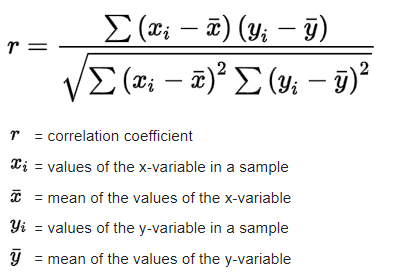

In [46]:
data_base2 = LP_Clean.drop(columns=['Price_euros']).assign(price =LP_Clean['Price_euros'])

In [47]:
data_base2['Flash'] = data_base2['Flash'] + data_base2['Flash+HDD']
data_base2['HDD'] = data_base2['HDD'] + data_base2['HDD+HDD'] *2  + data_base2['SSD+HDD']
data_base2['Hybrid'] = data_base2['Hybrid'] + data_base2['SSD+Hybrid']
data_base2['SSD'] = data_base2['SSD'] + data_base2['SSD+HDD'] + data_base2['SSD+Hybrid'] + data_base2['SSD+SSD']*2

In [48]:
data_base2 = data_base2.drop(columns=['Flash+HDD','HDD+HDD','SSD+HDD','SSD+Hybrid','SSD+SSD']) 
data_base2

,Inches,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,HDD,Hybrid,SSD,Brand_encd,Memory_total,price
0,13.3,16.0,2.3,8.0,1.37,0,0,0,1,1,128,1339.69
1,13.3,16.0,1.8,8.0,1.34,1,0,0,0,1,128,898.94
2,15.6,16.0,2.5,8.0,1.86,0,0,0,1,0,256,575.00
3,15.4,17.0,2.7,16.0,1.83,0,0,0,1,1,512,2537.45
4,13.3,16.0,3.1,8.0,1.37,0,0,0,1,1,256,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,17.0,2.5,4.0,1.80,0,0,0,1,0,128,638.00
1299,13.3,17.0,2.5,16.0,1.30,0,0,0,1,0,512,1499.00
1300,14.0,7.0,1.6,2.0,1.50,1,0,0,0,0,64,229.00
1301,15.6,17.0,2.5,6.0,2.19,0,1,0,0,0,1000,764.00


In [49]:
data_base2.describe()

,Inches,Cpu_Core,Cpu_GHZ,Ram_GB,Weight_kg,Flash,HDD,Hybrid,SSD,Brand_encd,Memory_total,price
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,14.881811,2.298772,8.382195,2.038734,0.057559,0.442057,0.00921,0.650038,0.016117,609.154259,1123.686992
std,1.426304,3.620835,0.506340,5.084665,0.665475,0.232998,0.498365,0.09556,0.483537,0.125973,467.724517,699.009043
min,10.100000,0.000000,0.900000,2.000000,0.690000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,174.000000
25%,14.000000,15.000000,2.000000,4.000000,1.500000,0.000000,0.000000,0.00000,0.000000,0.000000,256.000000,599.000000
50%,15.600000,16.000000,2.500000,8.000000,2.040000,0.000000,0.000000,0.00000,1.000000,0.000000,500.000000,977.000000
75%,15.600000,17.000000,2.700000,8.000000,2.300000,0.000000,1.000000,0.00000,1.000000,0.000000,1000.000000,1487.880000
max,18.400000,17.000000,3.600000,64.000000,4.700000,1.000000,2.000000,1.00000,2.000000,1.000000,2512.000000,6099.000000


<ipython-input-50-4dcdc5783e9f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Inches'),
  Text(0, 1.5, 'Cpu_Core'),
  Text(0, 2.5, 'Cpu_GHZ'),
  Text(0, 3.5, 'Ram_GB'),
  Text(0, 4.5, 'Weight_kg'),
  Text(0, 5.5, 'Flash'),
  Text(0, 6.5, 'HDD'),
  Text(0, 7.5, 'Hybrid'),
  Text(0, 8.5, 'SSD'),
  Text(0, 9.5, 'Brand_encd'),
  Text(0, 10.5, 'Memory_total'),
  Text(0, 11.5, 'price')])

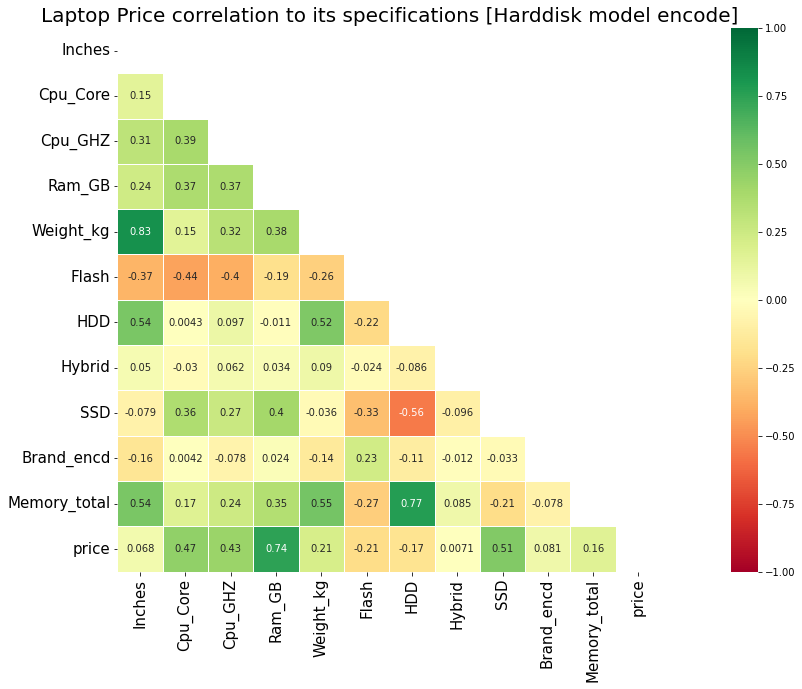

In [50]:
#Heatmap Correlation
import seaborn as sns
corr = data_base2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize=15)
plt.title('Laptop Price correlation to its specifications [Harddisk model encode]', fontsize=20)
plt.yticks(fontsize=15,rotation=0 )

by Heatmap correlation on general aspect above, we see much connection at all variables in between.
- CPU_Core
- CPU_GHZ
- RAM_GB
- Weight_kg
- HDD Type
- SSD Type
- SSD+HDD model
- Memory_total

## Distribution Value

**How is the distribution of the values of these variables?**

we will see how the distribution of values contained in the dataset, between the quantity of numbers that exist against the magnitude of that value.

we will test the variable of Laptop Price

In [51]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

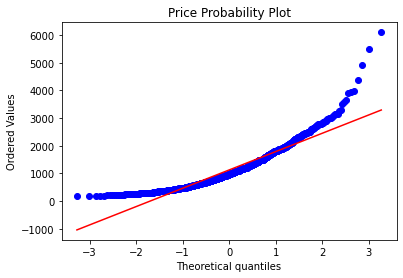

In [52]:
#Plot of Price data
stats.probplot(data_base['price'], dist= 'norm', plot=py)
plt.title('Price Probability Plot')
plt.show()

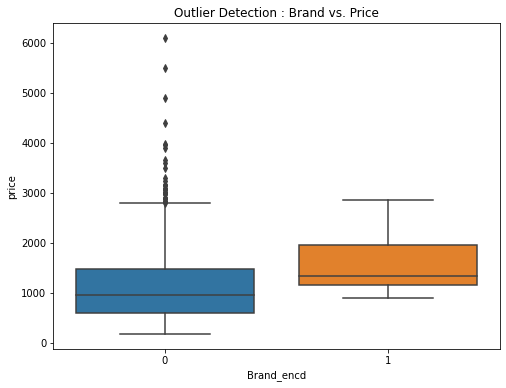

In [53]:
plt.figure(figsize = (8,6))
plt.title('Outlier Detection : Brand vs. Price')
sns.boxplot(x = 'Brand_encd', y = 'price', data = data_base2);

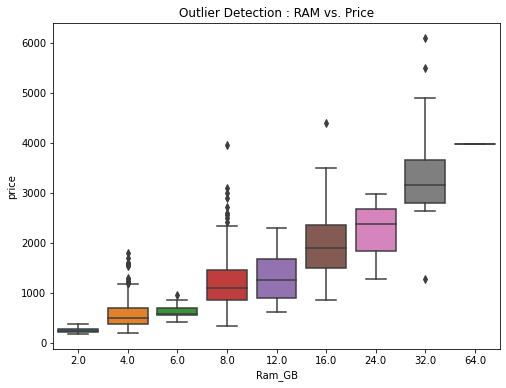

In [54]:
plt.figure(figsize = (8,6))
plt.title('Outlier Detection : RAM vs. Price')
sns.boxplot(x = 'Ram_GB', y = 'price', data = data_base2);

# Data Splitting

before we go over the Machine Learning Process, we need to split data for training and testing purpose.

input data is defined as day by day like following schedule:
- Training : 85%
- Testing : 15%

regarding to correlation map as a representation of variable importances, we then want to obtain selected data variables, such as : ALL VARIABLES

In [56]:
data_input = data_base2.drop(['Inches','Weight_kg','Flash','HDD','Hybrid','Brand_encd','Memory_total'], axis=1)
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cpu_Core  1303 non-null   float64
 1   Cpu_GHZ   1303 non-null   float64
 2   Ram_GB    1303 non-null   float64
 3   SSD       1303 non-null   uint8  
 4   price     1303 non-null   float64
dtypes: float64(4), uint8(1)
memory usage: 42.1 KB


In [57]:
data_input.describe()

,Cpu_Core,Cpu_GHZ,Ram_GB,SSD,price
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,14.881811,2.298772,8.382195,0.650038,1123.686992
std,3.620835,0.506340,5.084665,0.483537,699.009043
min,0.000000,0.900000,2.000000,0.000000,174.000000
25%,15.000000,2.000000,4.000000,0.000000,599.000000
50%,16.000000,2.500000,8.000000,1.000000,977.000000
75%,17.000000,2.700000,8.000000,1.000000,1487.880000
max,17.000000,3.600000,64.000000,2.000000,6099.000000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
x = data_input.drop(['price'], axis = 1) #Predictor
y = data_input['price'] #Label

In [61]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [62]:
x_scaled

,Cpu_Core,Cpu_GHZ,Ram_GB,SSD
0,0.941176,0.518519,0.096774,0.5
1,0.941176,0.333333,0.096774,0.0
2,0.941176,0.592593,0.096774,0.5
3,1.000000,0.666667,0.225806,0.5
4,0.941176,0.814815,0.096774,0.5
...,...,...,...,...
1298,1.000000,0.592593,0.032258,0.5
1299,1.000000,0.592593,0.225806,0.5
1300,0.411765,0.259259,0.000000,0.0
1301,1.000000,0.592593,0.064516,0.0


In [63]:
# dividing dataset : 
# Training Data : 85% of data (randomly)
# Testing Data : 15% of data (randomly)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.85, shuffle = True)

In [64]:
x_train

,Cpu_Core,Cpu_GHZ,Ram_GB,SSD
19,0.941176,0.259259,0.096774,0.5
1272,0.411765,0.259259,0.000000,0.0
224,1.000000,0.703704,0.225806,0.5
143,0.941176,0.518519,0.032258,0.0
1033,0.941176,0.518519,0.096774,0.5
...,...,...,...,...
588,1.000000,0.333333,0.161290,0.0
701,0.294118,0.740741,0.032258,0.5
921,1.000000,0.592593,0.096774,0.5
129,0.941176,0.259259,0.096774,0.5


In [65]:
y_train

19       979.00
1272     229.00
224     2456.34
143      602.00
1033    1195.00
         ...   
588      609.00
701      399.00
921     1296.99
129      928.00
895     1475.00
Name: price, Length: 1107, dtype: float64

# 4. Machine Learning Process
There are few kinds of supervised - machine learning to be conduct as follows:

Regression Based Model
- Linear Regression
- Lasso Regression
- Ridge Regression
- Support Vector Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Stochastic Gaussian Descent Regression
- XG-Boost Regression
- Gradient Boost Regression
- Multi-layer Perceptron Regression

The output is as follow:
- Laptop Prices

And we will check later:
- Graphic of prediction
- feature importances : to see significancy of each variables
- R2 value : as accuracy of prediction performance.

In [66]:
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 4.1. Regression Model (Processing)

### a. Linear Regression Model

In [67]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [68]:
y_train_pred_LinReg = Lin_reg.predict(x_train)
y_test_pred_LinReg = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-191.45841094535695
[ 506.06096647  377.81007364 4773.46070001  573.28462452]
0.5886443106978634


In [69]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= explained_variance_score(y_test,y_test_pred_LinReg).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

Linear Regression Performance
R2 :  0.589
MSE :  200276.876
MAE :  318.111
RMSE :  447.523
CV :  0.589


### b. Lasso Regression Model

In [70]:
from sklearn.linear_model import LinearRegression, Lasso
#Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
#Lasso = Lasso(alpha=3, fit_intercept=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso = Lasso(alpha=0.1, max_iter=1000, selection= 'random' )
Lasso.fit(x_train, y_train )

Lasso(alpha=0.1, selection='random')

In [71]:
y_train_pred_Lasso = Lasso.predict(x_train)
y_test_pred_Lasso = Lasso.predict(x_test)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-189.69713077619213
[ 505.97236795  377.09539931 4759.34322644  573.76141847]
0.5884373000790397


In [72]:
r2_Lasso = r2_score(y_test,y_test_pred_Lasso).round(3)
mse_Lasso=mean_squared_error(y_test,y_test_pred_Lasso).round(3)
mae_Lasso=mean_absolute_error(y_test,y_test_pred_Lasso).round(3)
rmse_Lasso=np.sqrt(mean_squared_error(y_test,y_test_pred_Lasso)).round(3)
CV_value_Lasso= explained_variance_score(y_test,y_test_pred_Lasso).round(3)
print('Lasso Regression Performance')
print('R2 : ', r2_Lasso)
print('MSE : ', mse_Lasso)
print('MAE : ', mae_Lasso)
print('RMSE : ', rmse_Lasso)
print('CV : ', CV_value_Lasso)
print

Lasso Regression Performance
R2 :  0.588
MSE :  200377.663
MAE :  318.168
RMSE :  447.636
CV :  0.589


<function print>

### c. Ridge Regression Model

In [73]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train, y_train)

Ridge()

In [74]:
y_train_pred_Ridge = Ridge.predict(x_train)
y_test_pred_Ridge = Ridge.predict(x_test)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-210.41210571931651
[ 551.34365401  437.77242785 4085.74789485  633.83357007]
0.5778432156098376


In [75]:
r2_Ridge = r2_score(y_test,y_test_pred_Ridge).round(3)
mse_Ridge=mean_squared_error(y_test,y_test_pred_Ridge).round(3)
mae_Ridge=mean_absolute_error(y_test,y_test_pred_Ridge).round(3)
rmse_Ridge=np.sqrt(mean_squared_error(y_test,y_test_pred_Ridge)).round(3)
CV_value_Ridge= explained_variance_score(y_test,y_test_pred_Ridge).round(3)
print('Ridge Regression Performance')
print('R2 : ', r2_Ridge)
print('MSE : ', mse_Ridge)
print('MAE : ', mae_Ridge)
print('RMSE : ', rmse_Ridge)
print('CV : ', CV_value_Ridge)

Ridge Regression Performance
R2 :  0.578
MSE :  205535.609
MAE :  321.889
RMSE :  453.36
CV :  0.578


### d. Support Vector Regression Model

In [76]:
lr_list = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597,3000]

for find_optimum in lr_list:
  SVR_optimum = SVR( kernel = 'linear', gamma= 'auto' , degree=6, tol=0.001, C=find_optimum, epsilon= 0.1, cache_size=200)
#find the most optimum C-value for SVRegression
  
  SVR_optimum.fit(x_train, y_train)

  print("C-Value: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(SVR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(SVR_optimum.score(x_test, y_test)))
  print()

C-Value: 1
Accuracy score (training): 0.045
Accuracy score (validation): 0.068

C-Value: 2
Accuracy score (training): 0.122
Accuracy score (validation): 0.138

C-Value: 3
Accuracy score (training): 0.179
Accuracy score (validation): 0.190

C-Value: 5
Accuracy score (training): 0.256
Accuracy score (validation): 0.256

C-Value: 8
Accuracy score (training): 0.311
Accuracy score (validation): 0.303

C-Value: 13
Accuracy score (training): 0.359
Accuracy score (validation): 0.342

C-Value: 21
Accuracy score (training): 0.408
Accuracy score (validation): 0.379

C-Value: 34
Accuracy score (training): 0.445
Accuracy score (validation): 0.409

C-Value: 55
Accuracy score (training): 0.488
Accuracy score (validation): 0.444

C-Value: 89
Accuracy score (training): 0.530
Accuracy score (validation): 0.478

C-Value: 144
Accuracy score (training): 0.570
Accuracy score (validation): 0.512

C-Value: 233
Accuracy score (training): 0.601
Accuracy score (validation): 0.540

C-Value: 377
Accuracy score (tr

In [77]:
from sklearn.svm import SVR
model_SVR = SVR_optimum = SVR( kernel = 'linear', gamma= 'scale' , degree=6, C=1000)
model_SVR.fit(x_train, y_train)

SVR(C=1000, degree=6, kernel='linear')

In [78]:
# use model to predict
y_test_pred_SVR = model_SVR.predict(x_test)

y_test_pred_SVR = y_test_pred_SVR.reshape(-1,1)
print(model_SVR.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3))

0.5695369829200898
457.799


In [79]:
r2_SVR = r2_score(y_test,y_test_pred_SVR).round(3)
mse_SVR=mean_squared_error(y_test,y_test_pred_SVR).round(3)
mae_SVR=mean_absolute_error(y_test,y_test_pred_SVR).round(3)
rmse_SVR=np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3)
CV_value_SVR= explained_variance_score(y_test,y_test_pred_SVR).round(3)
print('Support Vector Regression Performance')
print('R2 : ', r2_SVR)
print('MSE : ', mse_SVR)
print('MAE : ', mae_SVR)
print('RMSE : ', rmse_SVR)
print('CV : ', CV_value_SVR)

Support Vector Regression Performance
R2 :  0.57
MSE :  209579.667
MAE :  309.033
RMSE :  457.799
CV :  0.578


In [80]:
print(model_SVR.intercept_)
print(model_SVR.coef_)
print(model_SVR.score(x_test, y_test))

[-69.08521136]
[[ 397.12671861  258.51965895 4535.68599872  529.49897305]]
0.5695369829200898


### e. Decision Tree Regression

In [81]:
lr_list = [2, 3, 4, 5, 6, 7,8,10, 12,15,20,25,50]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=find_optimum, random_state=10)
#find the most optimum C value for DTC Regressor
  
  DTR_optimum.fit(x_train, y_train)

  print("Optimum Max Depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(DTR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(DTR_optimum.score(x_test, y_test)))
  print()

Optimum Max Depth: 2
Accuracy score (training): 0.593
Accuracy score (validation): 0.506

Optimum Max Depth: 3
Accuracy score (training): 0.667
Accuracy score (validation): 0.612

Optimum Max Depth: 4
Accuracy score (training): 0.706
Accuracy score (validation): 0.635

Optimum Max Depth: 5
Accuracy score (training): 0.724
Accuracy score (validation): 0.684

Optimum Max Depth: 6
Accuracy score (training): 0.741
Accuracy score (validation): 0.708

Optimum Max Depth: 7
Accuracy score (training): 0.757
Accuracy score (validation): 0.723

Optimum Max Depth: 8
Accuracy score (training): 0.762
Accuracy score (validation): 0.732

Optimum Max Depth: 10
Accuracy score (training): 0.769
Accuracy score (validation): 0.731

Optimum Max Depth: 12
Accuracy score (training): 0.770
Accuracy score (validation): 0.747

Optimum Max Depth: 15
Accuracy score (training): 0.770
Accuracy score (validation): 0.747

Optimum Max Depth: 20
Accuracy score (training): 0.770
Accuracy score (validation): 0.747

Optimu

In [82]:
lr_list = [2, 3, 4, 5, 6, 7,8,10, 15, 25,50, 100]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=12, random_state=find_optimum)
#find the most optimum C value for DTC Regressor
  
  DTR_optimum.fit(x_train, y_train)

  print("Optimum random state: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(DTR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(DTR_optimum.score(x_test, y_test)))
  print()

Optimum random state: 2
Accuracy score (training): 0.770
Accuracy score (validation): 0.737

Optimum random state: 3
Accuracy score (training): 0.770
Accuracy score (validation): 0.736

Optimum random state: 4
Accuracy score (training): 0.770
Accuracy score (validation): 0.737

Optimum random state: 5
Accuracy score (training): 0.770
Accuracy score (validation): 0.737

Optimum random state: 6
Accuracy score (training): 0.770
Accuracy score (validation): 0.736

Optimum random state: 7
Accuracy score (training): 0.770
Accuracy score (validation): 0.737

Optimum random state: 8
Accuracy score (training): 0.770
Accuracy score (validation): 0.737

Optimum random state: 10
Accuracy score (training): 0.770
Accuracy score (validation): 0.747

Optimum random state: 15
Accuracy score (training): 0.770
Accuracy score (validation): 0.736

Optimum random state: 25
Accuracy score (training): 0.770
Accuracy score (validation): 0.745

Optimum random state: 50
Accuracy score (training): 0.770
Accuracy 

In [85]:
# Fit decision tree model
DT_Reg = DecisionTreeRegressor(max_depth=12, random_state=10 )
DT_Reg.fit(x_train, y_train)

# Fit decision tree input-output
model_DTR = DT_Reg.fit(x_train, y_train)

In [86]:
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)
print(model_DTR.score(x_test, y_test))

0.7469288801310514


In [87]:
f_importance_DTR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances DTR':DT_Reg.feature_importances_}).sort_values(by = 'feature_importances DTR',ascending = False)
f_importance_DTR

,features,feature_importances DTR
2,Ram_GB,0.775678
1,Cpu_GHZ,0.092521
0,Cpu_Core,0.072932
3,SSD,0.058869


In [90]:
r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= explained_variance_score(y_test,y_test_pred_DTR).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

Linear Regression Performance
R2 :  0.747
MSE :  123212.817
MAE :  249.48
RMSE :  351.017
CV :  0.75


In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(DT_Reg)
#plt.show()

### f. Random Forest Regression Model

In [89]:
lr_list = [2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=find_optimum, random_state=1)
#find the most optimum C value for RFR Regressor
  
  RFR_optimum.fit(x_train, y_train)

  print("Optimum Max Depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(RFR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(RFR_optimum.score(x_test, y_test)))
  print()

Optimum Max Depth: 2
Accuracy score (training): 0.616
Accuracy score (validation): 0.552

Optimum Max Depth: 4
Accuracy score (training): 0.716
Accuracy score (validation): 0.686

Optimum Max Depth: 6
Accuracy score (training): 0.751
Accuracy score (validation): 0.729

Optimum Max Depth: 8
Accuracy score (training): 0.763
Accuracy score (validation): 0.740

Optimum Max Depth: 10
Accuracy score (training): 0.765
Accuracy score (validation): 0.738

Optimum Max Depth: 15
Accuracy score (training): 0.766
Accuracy score (validation): 0.740

Optimum Max Depth: 20
Accuracy score (training): 0.766
Accuracy score (validation): 0.740

Optimum Max Depth: 25
Accuracy score (training): 0.766
Accuracy score (validation): 0.740

Optimum Max Depth: 50
Accuracy score (training): 0.766
Accuracy score (validation): 0.740

Optimum Max Depth: 100
Accuracy score (training): 0.766
Accuracy score (validation): 0.740



In [91]:
lr_list = [2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=8, random_state=find_optimum)
#find the most optimum C value for RFR Regressor
  
  RFR_optimum.fit(x_train, y_train)

  print("Optimum random_state : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(RFR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(RFR_optimum.score(x_test, y_test)))
  print()

Optimum random_state : 2
Accuracy score (training): 0.764
Accuracy score (validation): 0.735

Optimum random_state : 4
Accuracy score (training): 0.763
Accuracy score (validation): 0.738

Optimum random_state : 6
Accuracy score (training): 0.764
Accuracy score (validation): 0.731

Optimum random_state : 8
Accuracy score (training): 0.764
Accuracy score (validation): 0.738

Optimum random_state : 10
Accuracy score (training): 0.764
Accuracy score (validation): 0.731

Optimum random_state : 15
Accuracy score (training): 0.764
Accuracy score (validation): 0.736

Optimum random_state : 20
Accuracy score (training): 0.764
Accuracy score (validation): 0.737

Optimum random_state : 25
Accuracy score (training): 0.763
Accuracy score (validation): 0.738

Optimum random_state : 50
Accuracy score (training): 0.763
Accuracy score (validation): 0.740

Optimum random_state : 100
Accuracy score (training): 0.763
Accuracy score (validation): 0.734



In [92]:
model_RFR = RandomForestRegressor(max_depth= 8, random_state=4)
model_RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, random_state=4)

In [93]:
# use model to predict
y_test_pred_RFR = (model_RFR.predict(x_test)).reshape(-1,1)

In [94]:
f_importance_RFR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances':model_RFR.feature_importances_}).sort_values(by = 'feature_importances',ascending = False)
f_importance_RFR

,features,feature_importances
2,Ram_GB,0.720768
0,Cpu_Core,0.118432
1,Cpu_GHZ,0.102802
3,SSD,0.057999


In [95]:
r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR = mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR = mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR = np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR = explained_variance_score(y_test,y_test_pred_RFR).round(3)
print('Random Forest Regression Performance')
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

Random Forest Regression Performance
R2 :  0.738
MSE :  127570.377
MAE :  250.317
RMSE :  357.17
CV :  0.74


### g. Stochastic Gaussian Descent Regression

In [96]:
from sklearn.linear_model import SGDRegressor

In [97]:
lr_list = [0.001,0.005,0.01,0.05,0.1, 0.15, 0.2, 0.25,0.35,0.5]

for find_optimum in lr_list:
  SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= find_optimum,  max_iter=3000, tol=0.001, validation_fraction=0.176, eta0=0.01, power_t=0.25  )
#find the most optimum l1_ratio for SGDRegression
  
  SGD_optimum.fit(x_train, y_train)

  print("Optimum l1_ratio : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(SGD_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(SGD_optimum.score(x_test, y_test)))
  print()

Optimum l1_ratio : 0.001
Accuracy score (training): 0.641
Accuracy score (validation): 0.577

Optimum l1_ratio : 0.005
Accuracy score (training): 0.641
Accuracy score (validation): 0.577

Optimum l1_ratio : 0.01
Accuracy score (training): 0.634
Accuracy score (validation): 0.568

Optimum l1_ratio : 0.05
Accuracy score (training): 0.640
Accuracy score (validation): 0.575

Optimum l1_ratio : 0.1
Accuracy score (training): 0.641
Accuracy score (validation): 0.576

Optimum l1_ratio : 0.15
Accuracy score (training): 0.634
Accuracy score (validation): 0.568

Optimum l1_ratio : 0.2
Accuracy score (training): 0.636
Accuracy score (validation): 0.571

Optimum l1_ratio : 0.25
Accuracy score (training): 0.643
Accuracy score (validation): 0.580

Optimum l1_ratio : 0.35
Accuracy score (training): 0.634
Accuracy score (validation): 0.568

Optimum l1_ratio : 0.5
Accuracy score (training): 0.636
Accuracy score (validation): 0.570



In [98]:
#SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= 0.25,  max_iter=3000, tol=0.005, validation_fraction=0.176, eta0=0.15, power_t=0.2 )
model_SGD = SGDRegressor(l1_ratio= 0.1 )
model_SGD.fit(x_train, y_train)

SGDRegressor(l1_ratio=0.1)

In [99]:
y_train_pred_SGD = model_SGD.predict(x_train)
y_test_pred_SGD = model_SGD.predict(x_test)

In [100]:
r2_SGD = r2_score(y_test,y_test_pred_SGD).round(3)
mse_SGD =mean_squared_error(y_test,y_test_pred_SGD).round(3)
mae_SGD =mean_absolute_error(y_test,y_test_pred_SGD).round(3)
rmse_SGD =np.sqrt(mean_squared_error(y_test,y_test_pred_SGD)).round(3)
CV_value_SGD = explained_variance_score(y_test,y_test_pred_SGD).round(3)
print('Stoc.Gaussian Desc. Regression Performance')
print('R2 : ', r2_SGD)
print('MSE : ', mse_SGD)
print('MAE : ', mae_SGD)
print('RMSE : ', rmse_SGD)
print('CV : ', CV_value_SGD)

Stoc.Gaussian Desc. Regression Performance
R2 :  0.574
MSE :  207218.968
MAE :  323.492
RMSE :  455.213
CV :  0.575


### h. XG Boost Regression

In [101]:
import xgboost as xg

In [102]:
lr_list = [1,2,3,4,5,8,13,21,34,55,89,144]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=find_optimum, learning_rate = 0.1  , random_state= 100 ) 
#find the most optimum max_depth for XGBoost Regression
  
  XGB_optimum.fit(x_train, y_train)

  print("Optimum max_depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(XGB_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(XGB_optimum.score(x_test, y_test)))
  print()

Optimum max_depth: 1
Accuracy score (training): 0.687
Accuracy score (validation): 0.623

Optimum max_depth: 2
Accuracy score (training): 0.729
Accuracy score (validation): 0.698

Optimum max_depth: 3
Accuracy score (training): 0.746
Accuracy score (validation): 0.732

Optimum max_depth: 4
Accuracy score (training): 0.759
Accuracy score (validation): 0.747

Optimum max_depth: 5
Accuracy score (training): 0.765
Accuracy score (validation): 0.759

Optimum max_depth: 8
Accuracy score (training): 0.769
Accuracy score (validation): 0.758

Optimum max_depth: 13
Accuracy score (training): 0.770
Accuracy score (validation): 0.751

Optimum max_depth: 21
Accuracy score (training): 0.770
Accuracy score (validation): 0.751

Optimum max_depth: 34
Accuracy score (training): 0.770
Accuracy score (validation): 0.751

Optimum max_depth: 55
Accuracy score (training): 0.770
Accuracy score (validation): 0.751

Optimum max_depth: 89
Accuracy score (training): 0.770
Accuracy score (validation): 0.751

Optim

In [104]:
lr_list = [0.001,0.005,0.01,0.05,0.075, 0.09,0.1,0.15,0.2, 0.25,0.35,0.5,0.75,1,1.25,1.5,1.75]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=5, learning_rate = find_optimum, random_state= 100 ) 
#find the most optimum learning_rate for XGBoost Regression
  
  XGB_optimum.fit(x_train, y_train)

  print("Optimum learning_rate: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(XGB_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(XGB_optimum.score(x_test, y_test)))
  print()

Optimum learning_rate: 0.001
Accuracy score (training): -2.029
Accuracy score (validation): -1.839

Optimum learning_rate: 0.005
Accuracy score (training): -0.537
Accuracy score (validation): -0.489

Optimum learning_rate: 0.01
Accuracy score (training): 0.250
Accuracy score (validation): 0.259

Optimum learning_rate: 0.05
Accuracy score (training): 0.760
Accuracy score (validation): 0.753

Optimum learning_rate: 0.075
Accuracy score (training): 0.763
Accuracy score (validation): 0.759

Optimum learning_rate: 0.09
Accuracy score (training): 0.764
Accuracy score (validation): 0.754

Optimum learning_rate: 0.1
Accuracy score (training): 0.765
Accuracy score (validation): 0.759

Optimum learning_rate: 0.15
Accuracy score (training): 0.767
Accuracy score (validation): 0.759

Optimum learning_rate: 0.2
Accuracy score (training): 0.768
Accuracy score (validation): 0.756

Optimum learning_rate: 0.25
Accuracy score (training): 0.769
Accuracy score (validation): 0.752

Optimum learning_rate: 0.

In [106]:
model_XGB = xg.XGBRegressor( max_depth=5, learning_rate = 0.75, random_state= 100  )
model_XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.75, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)

In [107]:
# use model to predict
y_test_pred_XGB = model_XGB.predict(x_test)

y_test_pred_XGB = y_test_pred_XGB.reshape(-1,1)
print(model_XGB.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_XGB)).round(3))

0.7440131002037821
353.033


In [108]:
r2_XGB = r2_score(y_test,y_test_pred_XGB).round(3)
mse_XGB =mean_squared_error(y_test,y_test_pred_XGB).round(3)
mae_XGB =mean_absolute_error(y_test,y_test_pred_XGB).round(3)
rmse_XGB =np.sqrt(mean_squared_error(y_test,y_test_pred_XGB)).round(3)
CV_value_XGB = explained_variance_score(y_test,y_test_pred_XGB).round(3)
print('X-Gradient Boost Performance')
print('R2 : ', r2_XGB)
print('MSE : ', mse_XGB)
print('MAE : ', mae_XGB)
print('RMSE : ', rmse_XGB)
print('CV : ', CV_value_XGB)

X-Gradient Boost Performance
R2 :  0.744
MSE :  124632.424
MAE :  248.402
RMSE :  353.033
CV :  0.747


In [109]:
f_importance_XGB = pd.DataFrame({'features':x_train.columns,
                                'feature_importances XGBoost':model_XGB.feature_importances_}).sort_values(by = 'feature_importances XGBoost',ascending = False)
f_importance_XGB

,features,feature_importances XGBoost
2,Ram_GB,0.787305
3,SSD,0.083157
0,Cpu_Core,0.077989
1,Cpu_GHZ,0.051549


### i. Gradient Boost Regression

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
lr_list = [10,20,50,100,110,120, 130, 150,250,400,500,1000]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = find_optimum, learning_rate=0.1, validation_fraction = 0.176 )
#find the most optimum n_estimator for GBRegression
  
  GBR_optimum.fit(x_train, y_train)

  print("Optimum n_estimator: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(GBR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(GBR_optimum.score(x_test, y_test)))
  print()

Optimum n_estimator: 10
Accuracy score (training): 0.599
Accuracy score (validation): 0.546

Optimum n_estimator: 20
Accuracy score (training): 0.699
Accuracy score (validation): 0.655

Optimum n_estimator: 50
Accuracy score (training): 0.740
Accuracy score (validation): 0.728

Optimum n_estimator: 100
Accuracy score (training): 0.750
Accuracy score (validation): 0.735

Optimum n_estimator: 110
Accuracy score (training): 0.751
Accuracy score (validation): 0.735

Optimum n_estimator: 120
Accuracy score (training): 0.752
Accuracy score (validation): 0.737

Optimum n_estimator: 130
Accuracy score (training): 0.753
Accuracy score (validation): 0.738

Optimum n_estimator: 150
Accuracy score (training): 0.755
Accuracy score (validation): 0.738

Optimum n_estimator: 250
Accuracy score (training): 0.760
Accuracy score (validation): 0.742

Optimum n_estimator: 400
Accuracy score (training): 0.762
Accuracy score (validation): 0.742

Optimum n_estimator: 500
Accuracy score (training): 0.763
Accur

In [112]:
lr_list = [0.001,0.005,0.01,0.05,0.1, 0.15,0.2,0.25,0.35,0.5]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = 250, learning_rate=find_optimum, validation_fraction = 0.176 )
#find the most optimum learning_rate for GBRegression
  
  GBR_optimum.fit(x_train, y_train)

  print("Optimum learning_rate: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(GBR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(GBR_optimum.score(x_test, y_test)))
  print()

Optimum learning_rate: 0.001
Accuracy score (training): 0.263
Accuracy score (validation): 0.244

Optimum learning_rate: 0.005
Accuracy score (training): 0.633
Accuracy score (validation): 0.588

Optimum learning_rate: 0.01
Accuracy score (training): 0.712
Accuracy score (validation): 0.677

Optimum learning_rate: 0.05
Accuracy score (training): 0.752
Accuracy score (validation): 0.736

Optimum learning_rate: 0.1
Accuracy score (training): 0.760
Accuracy score (validation): 0.742

Optimum learning_rate: 0.15
Accuracy score (training): 0.762
Accuracy score (validation): 0.740

Optimum learning_rate: 0.2
Accuracy score (training): 0.764
Accuracy score (validation): 0.744

Optimum learning_rate: 0.25
Accuracy score (training): 0.765
Accuracy score (validation): 0.742

Optimum learning_rate: 0.35
Accuracy score (training): 0.766
Accuracy score (validation): 0.743

Optimum learning_rate: 0.5
Accuracy score (training): 0.768
Accuracy score (validation): 0.727



In [114]:
model_GBReg = GradientBoostingRegressor( n_estimators = 250, learning_rate=0.2, validation_fraction = 0.176  )
model_GBReg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=250,
                          validation_fraction=0.176)

In [115]:
# use model to predict
y_test_pred_GBReg = model_GBReg.predict(x_test)

y_test_pred_GBReg = y_test_pred_GBReg.reshape(-1,1)
print(model_GBReg.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_GBReg)).round(3))

0.7407406521734822
355.283


In [116]:
r2_GBReg = r2_score(y_test,y_test_pred_GBReg).round(3)
mse_GBReg =mean_squared_error(y_test,y_test_pred_GBReg).round(3)
mae_GBReg =mean_absolute_error(y_test,y_test_pred_GBReg).round(3)
rmse_GBReg =np.sqrt(mean_squared_error(y_test,y_test_pred_GBReg)).round(3)
CV_value_GBReg = explained_variance_score(y_test,y_test_pred_GBReg).round(3)
print('Gradient Boost Regression Performance')
print('R2 : ', r2_GBReg)
print('MSE : ', mse_GBReg)
print('MAE : ', mae_GBReg)
print('RMSE : ', rmse_GBReg)
print('CV : ', CV_value_GBReg)

Gradient Boost Regression Performance
R2 :  0.741
MSE :  126225.682
MAE :  246.711
RMSE :  355.283
CV :  0.742


In [117]:
f_importance_GBR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances GBR':model_GBReg.feature_importances_}).sort_values(by = 'feature_importances GBR',ascending = False)
f_importance_GBR

,features,feature_importances GBR
2,Ram_GB,0.643251
0,Cpu_Core,0.174949
1,Cpu_GHZ,0.108887
3,SSD,0.072914


### j. Multi-layer Perceptron Regression Model

In [118]:
from sklearn.neural_network import MLPRegressor

In [ ]:
#data_inputNN= data_base.drop(['weight', 'Inches'], axis=1)

In [ ]:
# Separate input and target columns
#X = data_input.iloc[:, :-1]
#y = data_input.iloc[:, -1]

#X = data_input.drop(['price'], axis = 1) #Predictor
#y = data_input['price'] #Label

In [ ]:
# Scale input data with MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# Split data into training, validation, and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle= True)

In [119]:
y_train

19       979.00
1272     229.00
224     2456.34
143      602.00
1033    1195.00
         ...   
588      609.00
701      399.00
921     1296.99
129      928.00
895     1475.00
Name: price, Length: 1107, dtype: float64

In [125]:
lr_list = [24,48,96,192,384, 476]

for find_optimum in lr_list:
  MLP_optimum = MLPRegressor(hidden_layer_sizes=(find_optimum, 10), max_iter=500, random_state=8, validation_fraction=0.17)
#find the most optimum number of neuron in first layer
  
  MLP_optimum.fit(x_train, y_train)
  y_pred_MLP_test = MLP_optimum.predict(x_test)
  print("first layer neuron: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(MLP_optimum.score(x_train, y_train)))
  print("Accuracy score (testing): {:.3f}".format(MLP_optimum.score(x_test, y_test)))
  print("R2 (testing): {:.3f}".format(r2_score(y_test,y_pred_MLP_test).round(3)))
  print("RMSE (testing): {:.3f}".format( np.sqrt(mean_squared_error(y_test,y_pred_MLP_test))))
  print()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


first layer neuron: 24
Accuracy score (training): 0.412
Accuracy score (testing): 0.366
R2 (testing): 0.366
RMSE (testing): 555.549



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


first layer neuron: 48
Accuracy score (training): 0.498
Accuracy score (testing): 0.445
R2 (testing): 0.445
RMSE (testing): 519.646



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


first layer neuron: 96
Accuracy score (training): 0.552
Accuracy score (testing): 0.493
R2 (testing): 0.493
RMSE (testing): 496.680



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


first layer neuron: 192
Accuracy score (training): 0.606
Accuracy score (testing): 0.544
R2 (testing): 0.544
RMSE (testing): 471.318



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


first layer neuron: 384
Accuracy score (training): 0.635
Accuracy score (testing): 0.573
R2 (testing): 0.573
RMSE (testing): 455.986

first layer neuron: 476
Accuracy score (training): -2.615
Accuracy score (testing): -2.370
R2 (testing): -2.370
RMSE (testing): 1280.904



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [126]:
lr_list = [1,2,3,6,9,12,18,24,36,48]

for find_optimum in lr_list:
  MLP_optimum = MLPRegressor(hidden_layer_sizes=(384, find_optimum), max_iter=500, random_state=6, validation_fraction=0.17)
#find the most optimum number of neuron in first layer
  
  MLP_optimum.fit(x_train, y_train)
  y_pred_MLP_test = MLP_optimum.predict(x_test)
  print("second layer neuron: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(MLP_optimum.score(x_train, y_train)))
  print("Accuracy score (test): {:.3f}".format(MLP_optimum.score(x_test, y_test)))
  print("R2 (testing): {:.3f}".format(r2_score(y_test,y_pred_MLP_test).round(3)))
  print("RMSE (testing): {:.3f}".format( np.sqrt(mean_squared_error(y_test,y_pred_MLP_test))))
  print()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 1
Accuracy score (training): -2.617
Accuracy score (test): -2.372
R2 (testing): -2.372
RMSE (testing): 1281.222



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 2
Accuracy score (training): 0.577
Accuracy score (test): 0.517
R2 (testing): 0.517
RMSE (testing): 484.930



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 3
Accuracy score (training): 0.609
Accuracy score (test): 0.547
R2 (testing): 0.547
RMSE (testing): 469.434



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 6
Accuracy score (training): -2.613
Accuracy score (test): -2.369
R2 (testing): -2.369
RMSE (testing): 1280.642



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 9
Accuracy score (training): 0.646
Accuracy score (test): 0.583
R2 (testing): 0.583
RMSE (testing): 450.444



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 12
Accuracy score (training): 0.634
Accuracy score (test): 0.572
R2 (testing): 0.572
RMSE (testing): 456.703



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 18
Accuracy score (training): 0.642
Accuracy score (test): 0.579
R2 (testing): 0.579
RMSE (testing): 452.515



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 24
Accuracy score (training): 0.645
Accuracy score (test): 0.584
R2 (testing): 0.584
RMSE (testing): 450.165



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


second layer neuron: 36
Accuracy score (training): 0.652
Accuracy score (test): 0.591
R2 (testing): 0.591
RMSE (testing): 446.067

second layer neuron: 48
Accuracy score (training): 0.653
Accuracy score (test): 0.594
R2 (testing): 0.594
RMSE (testing): 444.661



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
lr_list = [2,4,8,16,48,100]

for find_optimum in lr_list:
  MLP_optimum = MLPRegressor(hidden_layer_sizes=(384, 36), max_iter=500, random_state= find_optimum, validation_fraction=0.17)
#find the most optimum number of neuron in first layer
  
  MLP_optimum.fit(x_train, y_train)
  y_pred_MLP_test = MLP_optimum.predict(x_test)
  print("random_state: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(MLP_optimum.score(x_train, y_train)))
  print("R2 (testing): {:.3f}".format(r2_score(y_test,y_pred_MLP_test).round(3)))
  print("RMSE (testing): {:.3f}".format( np.sqrt(mean_squared_error(y_test,y_pred_MLP_test))))
  print()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


random_state: 2
Accuracy score (training): 0.473
R2 (testing): 0.423
RMSE (testing): 529.956



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


random_state: 4
Accuracy score (training): 0.500
R2 (testing): 0.446
RMSE (testing): 519.164



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


random_state: 8
Accuracy score (training): 0.508
R2 (testing): 0.453
RMSE (testing): 515.855



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


random_state: 16
Accuracy score (training): 0.453
R2 (testing): 0.404
RMSE (testing): 538.610



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


random_state: 48
Accuracy score (training): 0.512
R2 (testing): 0.458
RMSE (testing): 513.508

random_state: 100
Accuracy score (training): 0.447
R2 (testing): 0.398
RMSE (testing): 541.561



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
# Create MLPRegressor model with much neurons in the first layer, fewer neurons in the second layer, and single output layer
model_MLPR = MLPRegressor(hidden_layer_sizes=(384, 36), max_iter=3000, random_state= 8, validation_fraction=0.17)

In [128]:
# Fit the model to the training data and validate with the validation data
model_MLPR.fit(x_train, y_train)
y_test_pred_MLPR = model_MLPR.predict(x_test)

In [129]:
r2_MLPR = r2_score(y_test,y_test_pred_MLPR).round(3)
mse_MLPR = mean_squared_error(y_test,y_test_pred_MLPR).round(3)
mae_MLPR = mean_absolute_error(y_test,y_test_pred_MLPR).round(3)
rmse_MLPR = np.sqrt(mean_squared_error(y_test,y_test_pred_MLPR)).round(3)
CV_value_MLPR = explained_variance_score(y_test,y_test_pred_MLPR).round(3)
print('Multi-layer Perceptron Regression Performance')
print('R2 : ', r2_MLPR)
print('MSE : ', mse_MLPR)
print('MAE : ', mae_MLPR)
print('RMSE : ', rmse_MLPR)
print('CV : ', CV_value_MLPR)

Multi-layer Perceptron Regression Performance
R2 :  0.597
MSE :  196178.903
MAE :  308.807
RMSE :  442.921
CV :  0.597


## 4.2 Results & Comparison : Regression Model

In [130]:
coef_Lin_reg = Lin_reg.coef_
coef_Ridge = Ridge.coef_
coef_Lasso = Lasso.coef_
coef_SGD = model_SGD.coef_
coef_SVR = (model_SVR.coef_).flatten()

In [131]:
numpy_importances = [[coef_Lin_reg],[coef_Lasso],[coef_Ridge],[coef_SVR]]

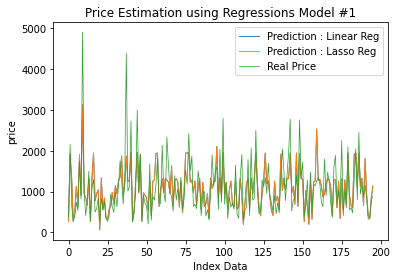

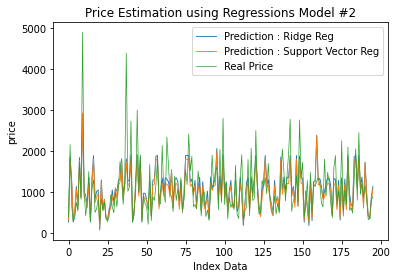

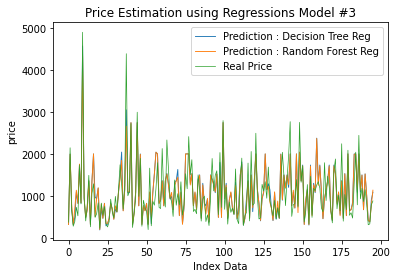

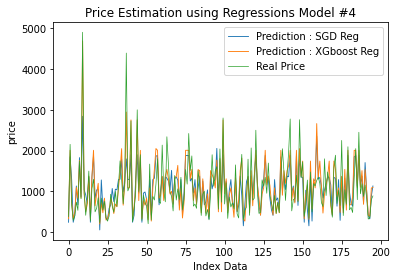

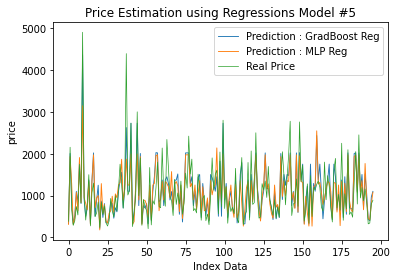

In [132]:
#see result of prediction result by using Linear Regression
plt.plot(pd.DataFrame(y_test_pred_LinReg), label = 'Prediction : Linear Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_Lasso), label = 'Prediction : Lasso Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #1')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show(  )
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression
plt.plot(pd.DataFrame(y_test_pred_Ridge), label = 'Prediction : Ridge Reg', linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_SVR), label = 'Prediction : Support Vector Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #2')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_DTR), label = 'Prediction : Decision Tree Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_RFR), label = 'Prediction : Random Forest Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #3')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_SGD), label = 'Prediction : SGD Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_XGB), label = 'Prediction : XGboost Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #4')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_GBReg), label = 'Prediction : GradBoost Reg', linewidth= 0.9  )
plt.plot(pd.DataFrame(y_test_pred_MLPR), label = 'Prediction : MLP Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #5')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 


In [134]:
data = np.array([['Algorithm', 'R2', 'MSE', 'MAE', 'RMSE', 'CV Value'],
                ['Linear Regression', r2_LinReg, mse_LinReg, mae_LinReg, rmse_LinReg, CV_value_LinReg],
                ['Lasso Regression', r2_Lasso, mse_Lasso, mae_Lasso, rmse_Lasso, CV_value_Lasso],
                ['Ridge Regression', r2_Ridge, mse_Ridge, mae_Ridge, rmse_Ridge, CV_value_Ridge],
                ['Support Vector Regression', r2_SVR, mse_SVR, mae_SVR, rmse_SVR, CV_value_SVR],
                ['Decision Tree Regression', r2_DTR, mse_DTR, mae_DTR, rmse_DTR, CV_value_DTR],
                ['Random Forest Regression', r2_RFR, mse_RFR, mae_RFR, rmse_RFR, CV_value_RFR],
                ['SGD Regression', r2_SGD, mse_SGD, mae_SGD, rmse_SGD, CV_value_SGD],
                ['XG-Boost Regression', r2_XGB, mse_XGB, mae_XGB, rmse_XGB, CV_value_XGB], 
                ['GradBoost Regression', r2_GBReg, mse_GBReg, mae_GBReg, rmse_GBReg, CV_value_GBReg],
                ['MLP Regression', r2_MLPR, mse_MLPR, mae_MLPR, rmse_MLPR, CV_value_MLPR],
                 ])

Text(0.5, 1.0, 'Prediction vs. Real Price : Comparison')

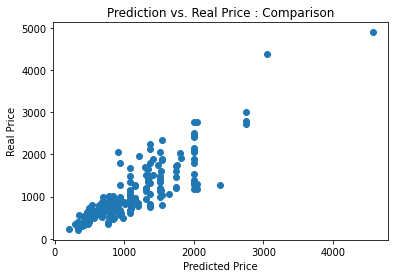

In [136]:
plt.scatter(y_test_pred_DTR, y_test )
plt.xlabel('Predicted Price')
plt.ylabel('Real Price')
plt.title('Prediction vs. Real Price : Comparison')

In [135]:
table_regression = pd.DataFrame(data=data[1:, 1:],
                     index = data[1:,0],
                     columns=(data[0,1:])).sort_values('RMSE', ascending = True)
table_regression

,R2,MSE,MAE,RMSE,CV Value
Decision Tree Regression,0.747,123212.817,249.48,351.017,0.75
XG-Boost Regression,0.744,124632.424,248.402,353.033,0.747
GradBoost Regression,0.741,126225.682,246.711,355.283,0.742
Random Forest Regression,0.738,127570.377,250.317,357.17,0.74
MLP Regression,0.597,196178.903,308.807,442.921,0.597
Linear Regression,0.589,200276.876,318.111,447.523,0.589
Lasso Regression,0.588,200377.663,318.168,447.636,0.589
Ridge Regression,0.578,205535.609,321.889,453.36,0.578
SGD Regression,0.574,207218.968,323.492,455.213,0.575
Support Vector Regression,0.57,209579.667,309.033,457.799,0.578


In [ ]:
data_importance = pd.DataFrame({"features" : x_train.columns, "LinearReg":coef_Lin_reg, "Lasso.Reg" : coef_Lasso, "Ridge.Reg":coef_Ridge, "SGD.Reg":coef_SGD, "SV.Reg":coef_SVR, "Dec.Tree.Reg" : DT_Reg.feature_importances_, "RanForest.Reg": model_RFR.feature_importances_, "GradBoost.Reg":model_GBReg.feature_importances_, "XGBoost.Reg":model_XGB.feature_importances_}).sort_values('XGBoost.Reg', ascending = False)
data_importance

,features,LinearReg,Lasso.Reg,Ridge.Reg,SGD.Reg,SV.Reg,Dec.Tree.Reg,RanForest.Reg,GradBoost.Reg,XGBoost.Reg
3,Ram_GB,4622.385232,4624.143668,3757.967824,2942.880246,4243.741887,0.669865,0.613016,0.473153,0.436897
8,SSD,452.172159,460.493142,518.393655,616.185585,625.344315,0.033079,0.026725,0.047507,0.206560
1,Cpu_Core,538.102608,537.035142,582.353977,661.226177,475.256577,0.033350,0.065321,0.116444,0.123005
2,Cpu_GHZ,601.141783,598.904541,632.635945,695.911221,396.856943,0.084251,0.090279,0.130410,0.061639
4,Weight_kg,394.257608,370.297885,485.448569,614.422831,-19.456770,0.103215,0.134560,0.165078,0.038581
5,Flash,88.887787,91.345951,117.255173,201.949935,136.369622,0.002405,0.001405,0.003129,0.031776
7,Hybrid,-128.707566,-105.546666,-140.164135,-131.220114,122.266715,0.000000,0.000068,0.000305,0.031543
0,Inches,-643.522126,-623.266158,-621.500238,-644.469285,-333.963466,0.029600,0.028214,0.023094,0.023801
6,HDD,-195.517239,-177.618405,-312.240904,-453.020889,128.755282,0.014113,0.008371,0.013637,0.022397
10,Memory_total,149.139603,131.973212,348.983162,634.974353,14.842818,0.030121,0.031279,0.026244,0.015948


In [ ]:
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay